In [617]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

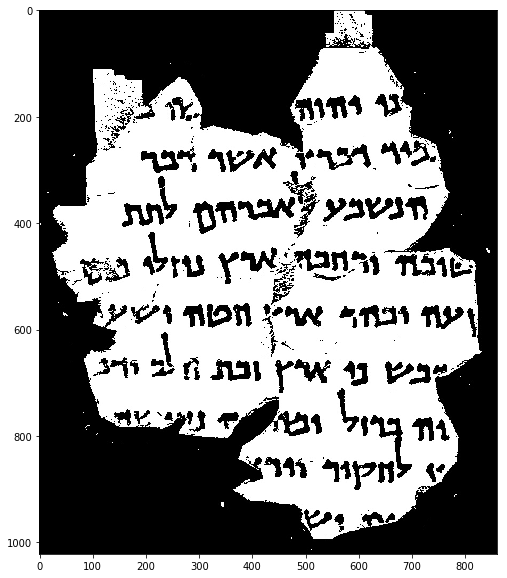

In [618]:
path = 'image-output/test7_binarized.jpg'
path_gray = 'image-output/test7_extracted.jpg'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
image_gray = cv2.imread(path_gray, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (500,10))
plt.imshow(image, cmap='gray', aspect = 1)
plt.show()

In [619]:
#_, image_bin = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
image_bin = np.array(image)

In [620]:
#image_bin = 255 - image_bin
kernel = np.ones((5,5),np.uint8)
image_bin = cv2.morphologyEx(image_bin, cv2.MORPH_CLOSE, kernel)
#image_bin = 255 - image_bin

#image_bin = cv2.medianBlur(image_bin, 3)


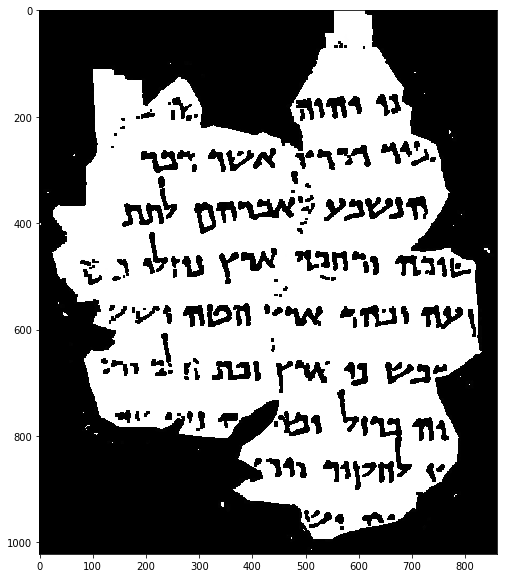

In [621]:
plt.figure(figsize = (500,10))
plt.imshow(image_bin, cmap='gray', aspect = 1)
plt.show()

In [622]:
image_bin = 255 - image_bin
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image_bin, 8, cv2.CV_32S)
image_bin = 255 - image_bin

In [623]:
n_labels

183

In [624]:
stats

array([[     0,      0,    847,   1014, 418159],
       [     0,      0,    860,   1022, 383493],
       [   561,     46,     22,     25,    284],
       [   604,     60,      6,      5,     30],
       [   546,     66,      5,      5,     25],
       [   553,     66,      8,      5,     40],
       [   608,     67,      5,      6,     30],
       [   632,    158,     27,     41,    531],
       [   657,    158,     23,     39,    513],
       [   581,    160,     25,     36,    506],
       [   538,    162,     42,     42,   1043],
       [   249,    164,     38,     40,    542],
       [   482,    165,     35,     41,    684],
       [   517,    166,     20,     36,    408],
       [   242,    173,      5,      5,     25],
       [   206,    186,      8,      5,     40],
       [   247,    187,      9,     20,    161],
       [   490,    186,     10,     23,    171],
       [   183,    192,     34,     13,    270],
       [   291,    195,      8,      7,     51],
       [   276,    1

In [625]:
min_thresh = 400
max_thresh = 10000
boxes = []
box_centroids = []
for i in range(len(stats)):
    if(stats[i][4] >= min_thresh and stats[i][4] <= max_thresh):
        x = stats[i][0]
        y = stats[i][1]
        width = stats[i][2]
        height = stats[i][3]
        temp_stat = np.append(stats[i], centroids[i])
        boxes.append(temp_stat)
        box_centroids.append(centroids[i])
        cv2.rectangle(image,(x,y),(x + width,y + height),(0,200,0),3)

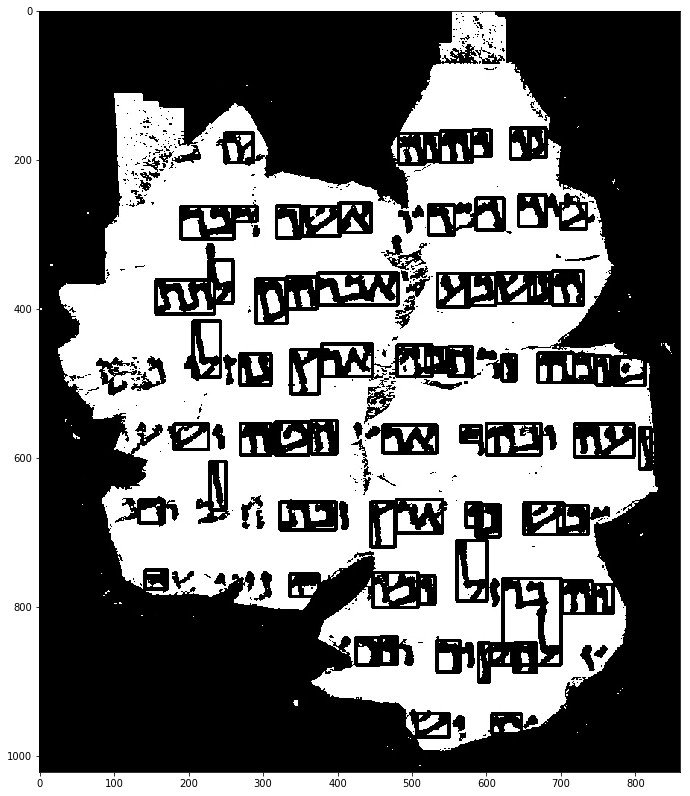

In [626]:
final_image = np.copy(image)
plt.figure(figsize = (500,14))
plt.imshow(final_image, cmap='gray', aspect = 1)
plt.show()

In [627]:
avg_width = 0
avg_height = 0
N = len(boxes)

In [628]:
for box in boxes:
    avg_width += box[2]
    avg_height += box[3]
avg_width /= N
avg_height /= N

avg_height *= 1

In [629]:
avg_width

40.541666666666664

In [630]:
avg_height

42.763888888888886

In [631]:
box_threshold = avg_height * 2

word_lines = []
line = []

# calculate average centroids for each line
line.append(boxes[0][6])
line.append(1)
word_lines.append(line)
for temp_i in range(len(boxes) - 1):
    i = temp_i + 1
    box = boxes[i]
    #check if box belongs to the same line as the previous one: check if centroid of box falls within the range of the previous
    #box
    centroid_y = box[6]
    box_height = box[3]
    
    if box_height < box_threshold:
        empty_flag = True
        for temp_line in word_lines:
            temp_centroid = temp_line[0]
            if(centroid_y >= (temp_centroid - avg_height) and (centroid_y <= temp_centroid + avg_height)):
                empty_flag = False
                temp_line[0] = (temp_line[0] * temp_line[1] + centroid_y) / (temp_line[1] + 1)
                temp_line[1] += 1
        if empty_flag:
            line = []
            line.append(box[6])
            line.append(1)
            word_lines.append(line)
            
for line in word_lines:
    print(line)
    
    
# include boxes within certain height of the average centroids
for i in range(len(boxes)):
    box = boxes[i]
    #check if box belongs to the same line as the previous one: check if centroid of box falls within the range of the previous
    #box
    centroid_y = box[6]
    box_height = box[3]
    
    if box_height < box_threshold:
        empty_flag = True
        for temp_line in word_lines:
            temp_centroid = temp_line[0]
            if(centroid_y >= (temp_centroid - avg_height) and (centroid_y <= temp_centroid + avg_height)):
                temp_line.append(box)

for line in word_lines:
    line.pop(0)
    line.pop(0)

[179.04843099943784, 7]
[276.3584842498199, 9]
[374.5417709651637, 10]
[474.14084095296056, 12]
[573.655398285895, 9]
[674.1091943209375, 9]
[772.7082012709864, 7]
[862.5910684645546, 6]
[956.8215094954187, 2]


In [632]:
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
height,width = image.shape

In [633]:
line_image = np.array(image)

In [634]:
# to preserve more line spacebased on average_height
line_buffer_fraction = 0.1
line_buffer = int(line_buffer_fraction * avg_height)

#save strips
strips = []

# draw lines for the first strip
for line in word_lines:
    min_height = 99999
    max_height = 0
    for box in line:
        if(box[1] < min_height):
            min_height = box[1]
        if(box[1] + box[3]  > max_height):
            max_height = box[1] + box[3] 
    
    min_height = int(min_height)
    max_height = int(max_height)
    
    cv2.line(line_image,(0, min_height),(width, min_height),(0, 200,0), 4)   
    cv2.line(line_image,(0, max_height),(width, max_height),(0, 200,0), 4) 
    
    min_height = 0 if (min_height - line_buffer) < 0 else min_height - line_buffer
    x=True if 'a'=='a' else False
    max_height = height if (max_height + line_buffer) > height else max_height + line_buffer
    strips.append([min_height, max_height])
    

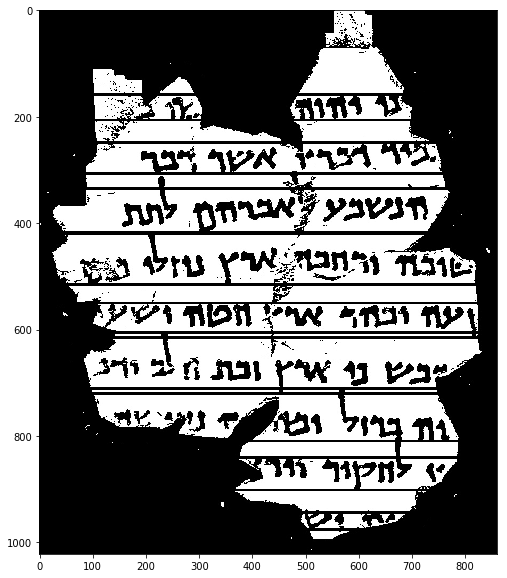

In [635]:
plt.figure(figsize = (500,10))
plt.imshow(line_image, cmap='gray', aspect = 1)
plt.show()

413 519


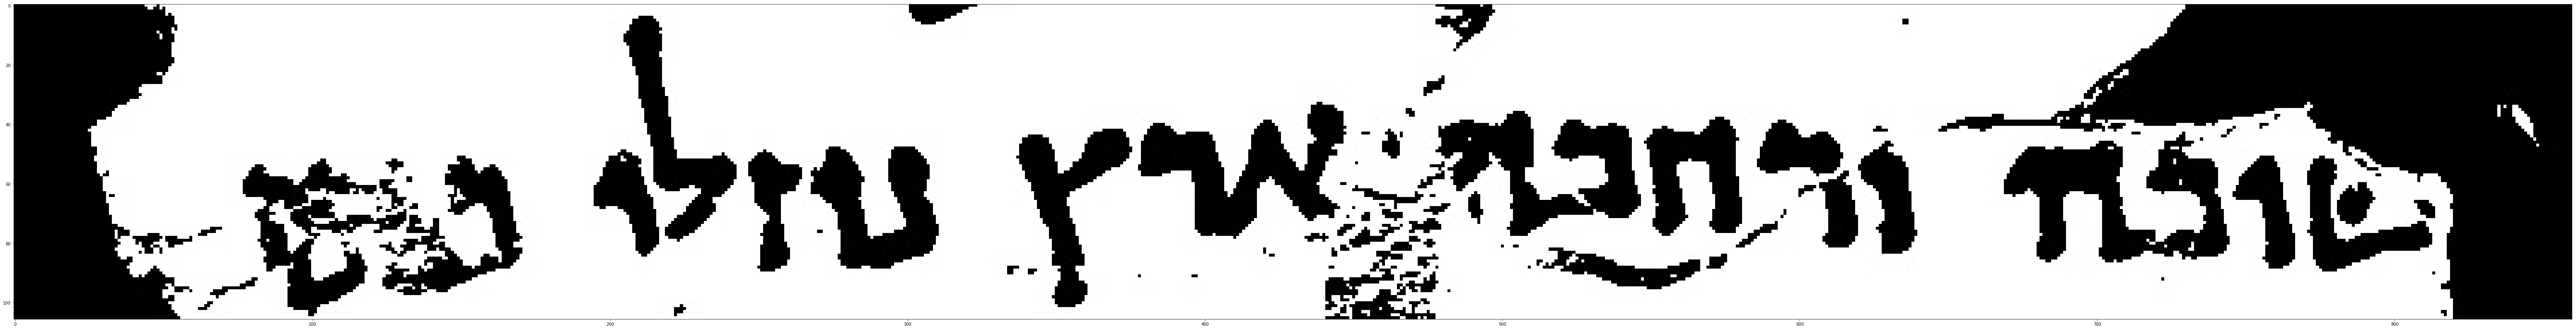

In [636]:
[y1, y2] = strips[3] 

strip_img = image[y1:y2, 0:width]
strip_img_gray = image_gray[y1:y2, 0:width]
print(y1,y2)
plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

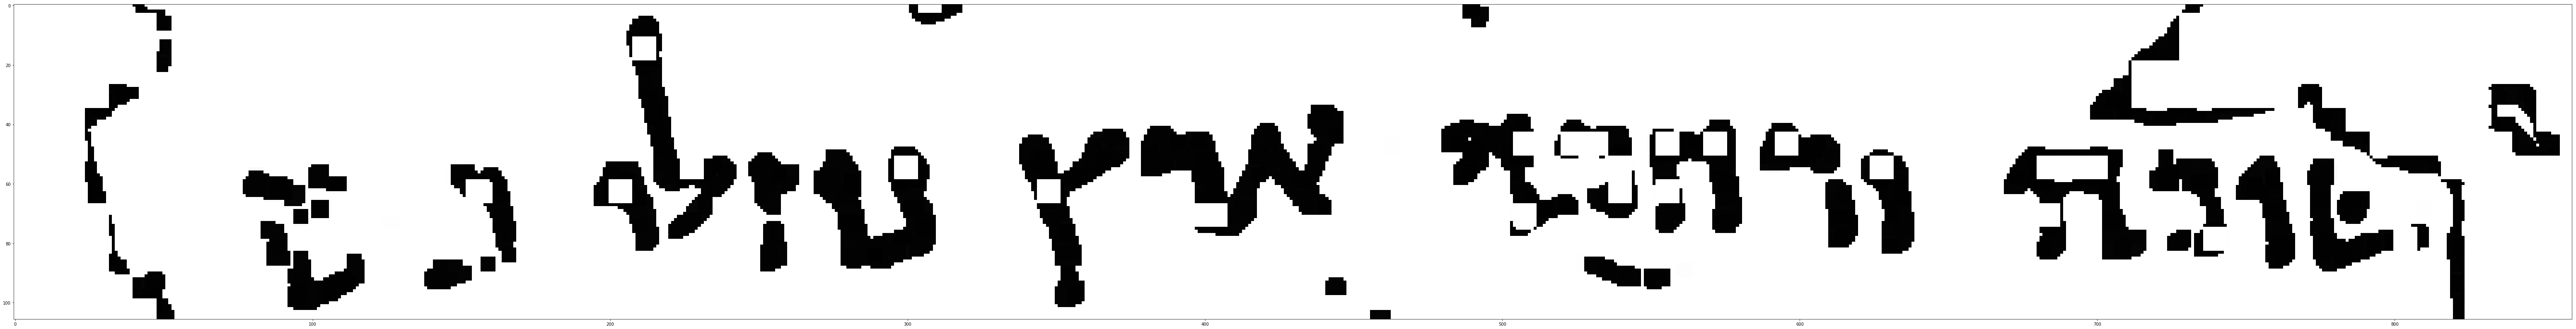

In [637]:
strip_img = cv2.morphologyEx(strip_img, cv2.MORPH_CLOSE, kernel)
#strip_img = cv2.GaussianBlur(strip_img, (5,5) , 0)
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(strip_img, 8, cv2.CV_32S)
n_labels
mx = 0
background_index = 0
"""for i in range(len(stats)):
    if(stats[i][0] == 0 and stats[i][1] == 0):
        background_index = i
background = stats[background_index]

height, width = strip_img.shape
for i in range(height):
    for j in range(width):
        if(labels[i][j] == background_index):
            strip_img[i][j] = 255
"""

strip_img[strip_img == 0] = 255

plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

In [638]:
strip_img = 255 - strip_img

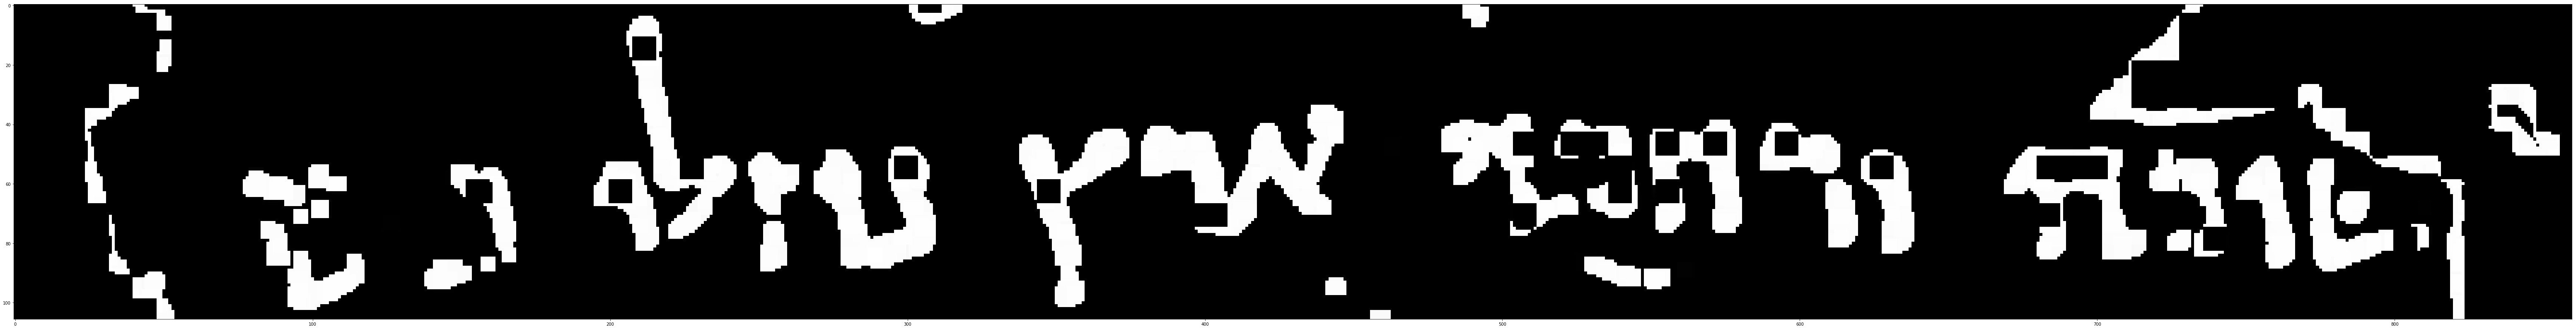

In [639]:
plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

In [640]:
strip_img = cv2.dilate(strip_img,kernel,iterations = 2)
strip_img = cv2.GaussianBlur(strip_img, (9,9), 0)
_, strip_img = cv2.threshold(strip_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)



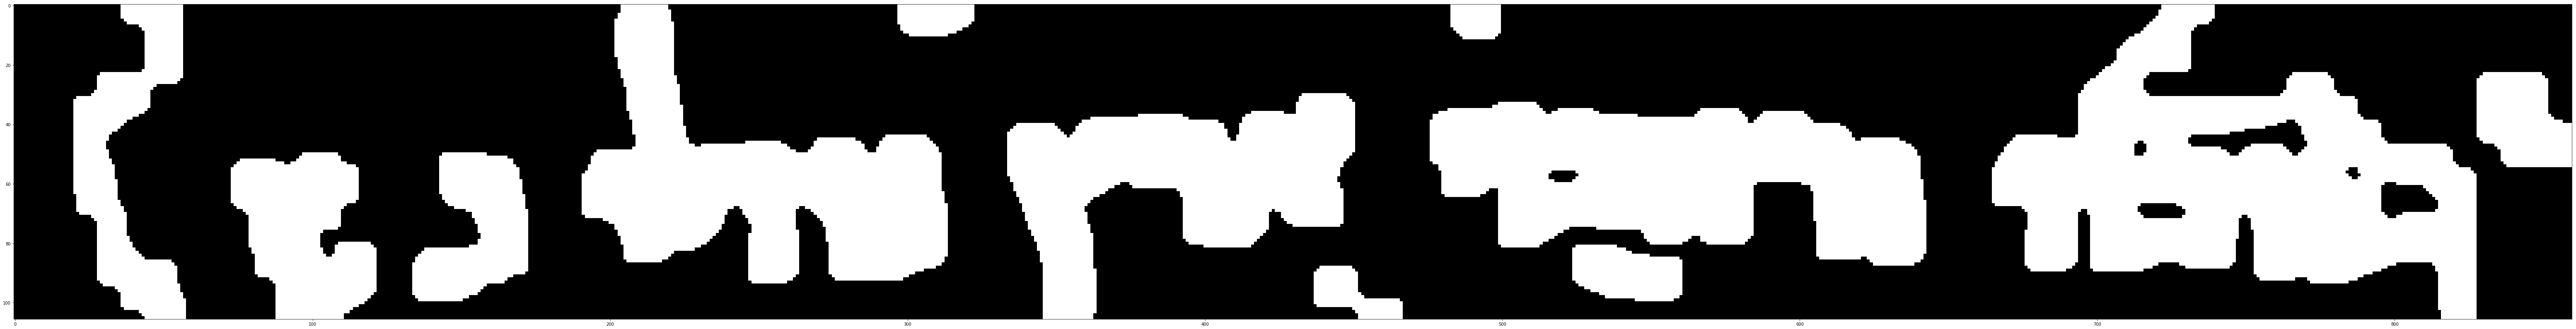

In [641]:
plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

In [642]:
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(strip_img, 8, cv2.CV_32S)

In [643]:
n_labels

13

In [644]:
stats

array([[    0,     0,   860,   106, 59036],
       [   20,     0,    38,   106,  1821],
       [  191,     0,   123,    94,  5435],
       [  297,     0,    26,    11,   256],
       [  483,     0,    17,    12,   191],
       [  665,     0,   163,   106,  8621],
       [  828,    23,    32,    32,   823],
       [  334,    30,   117,    76,  4529],
       [  476,    33,   167,    55,  6340],
       [   73,    50,    49,    56,  1931],
       [  134,    50,    39,    50,  1290],
       [  524,    81,    37,    19,   574],
       [  437,    88,    30,    18,   313]], dtype=int32)

In [647]:
idx = 2

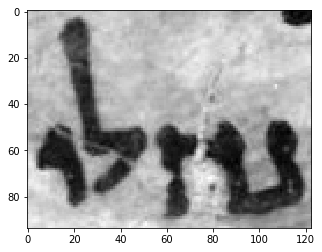

In [648]:
strip_img = image[y1:y2, 0:stats[0][2]]
plt.figure(figsize = (500,4))
#plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.imshow(strip_img_gray[stats[idx][1]:stats[idx][1]+stats[idx][3], stats[idx][0]:stats[idx][0]+stats[idx][2]], cmap='gray', aspect = 1)
plt.show()

In [ ]:
#write found words to folder
counter = 1
for i in range(n_labels):
    if(stats[i][4] > 1000 and i != 0):
        word = strip_img[stats[i][1]:stats[i][1]+stats[i][3], stats[i][0]:stats[i][0]+stats[i][2]]
        path = 'word-images/word' + str(counter) + '.png'
        counter += 1
        cv2.imwrite(path, word)